In [1]:
import jieba
import jieba.analyse
jieba.set_dictionary('dict.txt.big')##加入繁體中文

In [8]:
print("Start Build")
import re
from collections import Counter
import matplotlib.pyplot as plt

text = ""
words = []
dict = {}
weight = []

with open('hw1-dataset.txt',encoding="utf-8") as file:
    for i,line in enumerate(file.readlines()):
        line = re.sub("[A-Za-z0-9\：\?\(\.\·\—\，\。\“ \”]", "", line)

        text += line;
        
        #建立分詞
        jieba.add_word('為什麼')
        jieba.add_word('有沒有')
        tags = jieba.lcut(line,cut_all=False)
        for tag in tags:
            if tag == "" or tag == '\t' or tag == '\n':
                continue;
            words.append(tag)
        
        c = Counter()
        index = 1
        for x in words:
            if len(x)>1 and x != '\r\n':
                c[x] += 1
                dict.setdefault(x, index)
                index = index + 1    

print("Finish!")

Start Build
Finish!


Start Freq


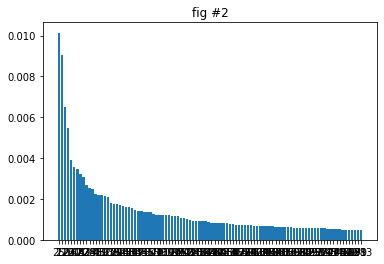

In [9]:
print("Start Freq")
TotalWord = len(words)
x_label = []
y_label = []

with open('WordNumber_fig2.txt', 'a') as WordNum:
    WordNum.truncate(0)
    table = '字彙編號對應表_前一百個高頻詞彙\n\n'
    WordNum.write(table)
    table = "word        index\n\n"
    WordNum.write(table)
    for (k,v) in c.most_common(100):
        freq = v/TotalWord
        ##print("index %d %s:%d %f"%(dict[k],k, v, freq))
        
        ## 建立字彙編號對應表
        table = k.ljust(10)  + " " + str(dict[k]) + '\n'
        WordNum.write(table)

        x_label.append(str(dict[k]))
        y_label.append(freq)

plt.title('fig #2')
plt.bar(x_label,y_label)
plt.show()

### 正式版

Start TF-IDF


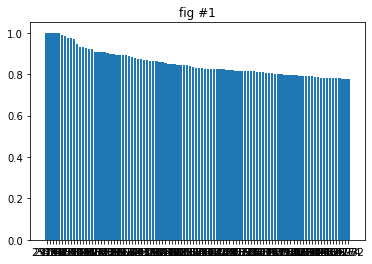

In [10]:
print("Start TF-IDF")
from sklearn.feature_extraction.text import TfidfVectorizer
import re
x_label = []
y_label = []
totalContent = [] 
table = {}
with open('hw1-dataset.txt',encoding="utf-8") as file:
    for i,line in enumerate(file.readlines()):

        article = ''
        
        line = re.sub("[A-Za-z0-9\：\?\(\.\·\—\，\。\“ \”]", "", line)

        words = jieba.lcut(line, cut_all=False)
        for word in words:
            
            if word == "" or word == '\t' or word == '\n':
                    continue;

            m = re.match(r'^[\u4E00-\u9FFFa-zA-Z]+$',word )
            if m is not None:
                article += word
                article += ' '
                
        totalContent.append(article)

## 權重值
textWeightList = []

if __name__ == "__main__":  
    ##計算全部文章
    tfIdfVectorizer = TfidfVectorizer()    
    tfIdf = tfIdfVectorizer.fit_transform(totalContent)    
    
    myWord=tfIdfVectorizer.get_feature_names()        
     
    weight=tfIdf.toarray()        
    for i in range(len(weight)):
        ## 用來裝單篇權重值
        textMining = {}       
        for j in range(len(myWord)):             
            ##print( myWord[j],weight[i][j] ) 
            textMining[myWord[j]] = weight[i][j]
        textWeightList.append(textMining)
        
for oneArticle in textWeightList:
    dict2= sorted(oneArticle.items(), key=lambda d:d[1], reverse = True)


    for i in range(0,3):
        table.setdefault(dict2[i][0], dict2[i][1])
        
new = sorted(table.items(), key=lambda e:e[1], reverse=True)
### 將關鍵詞放進與其所對應的新聞
with open('WordNumber_fig1.txt', 'a') as WordNum:
    WordNum.truncate(0)
    text = '字彙編號對應表_前一百個TF-IDF權重⾼詞彙\n\n'
    WordNum.write(text)
    text = "word        index\n\n"
    WordNum.write(text)
    
    for i in range(0, 100):
        ##print(new[i])
        text = new[i][0].ljust(10)  + " " + str(dict[new[i][0]]) + '\n'
        WordNum.write(text)
        x_label.append(str(dict[new[i][0]]))
        y_label.append(new[i][1])
    
plt.title('fig #1')
plt.bar(x_label,y_label)
plt.show()